<table width=100%; style="background-color:#caf0fa";>
    <tr style="background-color:#caf0fa">
        <td>
            <h1 style="text-align:right">
                Python for Data Science Training - Week 4
            </h1>
        </td>
        <td>
            <img src="../img/jica-logo.png" alt = "JICA Training" style = "width: 100px;"/>
        </td>
    </tr>
</table>

# Today's Contents
1. Matplotlib
2. Seaborn

---

# 1. Matplotlib
Matplotlib is the most famous and popular visualization library in Python.

### Creating a Japanese language environment for matplotlib
Matplotlibはデフォルトでは日本語を読み込む際に文字化けします。以下のように、Matplotlibの文字設定を変更しておく必要があります。  
参考1：[Qiita matplotlibで日本語](https://qiita.com/yniji/items/3fac25c2ffa316990d0c)  
参考2：[ESRI Japan matplotlib での日本語利用について](https://esrijapan.github.io/arcgis-dev-resources/tips/python/matplotlib-japanese/)

In [1]:
import matplotlib.font_manager as fm
fm_list = fm.findSystemFonts()
fm_list

['/System/Library/Fonts/Supplemental/NotoSansCham-Regular.ttf',
 '/System/Library/Fonts/Helvetica.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansSundanese-Regular.ttf',
 '/opt/X11/share/fonts/TTF/VeraSeBd.ttf',
 '/System/Library/Fonts/Supplemental/NotoSerifBalinese-Regular.ttf',
 '/System/Library/Fonts/Supplemental/AlBayan.ttc',
 '/Users/yokoihiroyuki/Library/Fonts/Roboto/Roboto-ThinItalic.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansMandaic-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Krungthep.ttf',
 '/System/Library/Fonts/Supplemental/Lao MN.ttc',
 '/Users/yokoihiroyuki/Library/Fonts/Lato-Regular.ttf',
 '/System/Library/Fonts/KohinoorTelugu.ttc',
 '/System/Library/Fonts/Supplemental/STIXIntDBol.otf',
 '/System/Library/Fonts/Supplemental/NotoSansChakma-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Verdana Bold Italic.ttf',
 '/System/Library/Fonts/Supplemental/Comic Sans MS Bold.ttf',
 '/Users/yokoihiroyuki/Library/Fonts/Roboto_Condensed/RobotoCondensed-LightItali

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["font.family"] = "sans-serif"
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

## Preprocessing

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# percent is called magic command to allow specific behaviour in the notebook.

In [4]:
# 国勢調査　男女別人口－全国，都道府県（大正９年～平成27年）
url = 'https://www.e-stat.go.jp/stat-search/file-download?statInfId=000031524010&fileKind=1'
df = pd.read_csv(url, encoding="shift-jis")

In [5]:
df.head()

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,注,人口（総数）,人口（男）,人口（女）
0,00,全国,大正,9.0,1920.0,NaN,55963053,28044185,27918868
1,01,北海道,大正,9.0,1920.0,NaN,2359183,1244322,1114861
2,02,青森県,大正,9.0,1920.0,NaN,756454,381293,375161
3,03,岩手県,大正,9.0,1920.0,NaN,845540,421069,424471
4,04,宮城県,大正,9.0,1920.0,NaN,961768,485309,476459


In [6]:
df.isnull().sum()

都道府県コード      0
都道府県名        2
元号           2
和暦（年）        2
西暦（年）        2
注          886
人口（総数）       2
人口（男）        2
人口（女）        2
dtype: int64

In [7]:
df.tail()

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,注,人口（総数）,人口（男）,人口（女）
977,45,宮崎県,平成,27.0,2015.0,NaN,1104069,519242,584827
978,46,鹿児島県,平成,27.0,2015.0,NaN,1648177,773061,875116
979,47,沖縄県,平成,27.0,2015.0,NaN,1433566,704619,728947
980,1) 沖縄県は調査されなかったため，含まれていない。,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981,2) 長野県西筑摩群山口村と岐阜県中津川市の境界紛争地域人口（男39人，女34人）は全国に含...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.iloc[:-2, :].reset_index(drop = True)

In [9]:
df.tail()

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,注,人口（総数）,人口（男）,人口（女）
975,43,熊本県,平成,27.0,2015.0,NaN,1786170,841046,945124
976,44,大分県,平成,27.0,2015.0,NaN,1166338,551932,614406
977,45,宮崎県,平成,27.0,2015.0,NaN,1104069,519242,584827
978,46,鹿児島県,平成,27.0,2015.0,NaN,1648177,773061,875116
979,47,沖縄県,平成,27.0,2015.0,NaN,1433566,704619,728947


In [10]:
# drop columns
df = df.drop(columns = ['元号', '和暦（年）', '注'])

In [11]:
# Change column names
df.columns = ['code', 'pref', 'year', 'pop_total', 'pop_men', 'pop_women']

In [12]:
df.isnull().sum()

code         0
pref         0
year         0
pop_total    0
pop_men      0
pop_women    0
dtype: int64

In [13]:
df.dtypes

code          object
pref          object
year         float64
pop_total     object
pop_men       object
pop_women     object
dtype: object

In [14]:
# Change data type of year, pop_total, pop_men, pop_women
df['year']  = df['year'].astype(int)

# columns of pop have string values, which raise error if using .astype. Instead, use pd.to_numeric with errors options.
# This returns non-integer as null value.
df['pop_total'] = pd.to_numeric(df['pop_total'], errors = 'coerce')
df['pop_men'] = pd.to_numeric(df['pop_men'], errors = 'coerce')
df['pop_women'] = pd.to_numeric(df['pop_women'], errors = 'coerce')

# drop null values
df = df.dropna().reset_index(drop = True)

In [15]:
for col in ['pref', 'year']:
    print('\n' + col + ': ' , df[col].unique())


pref:  ['全国' '北海道' '青森県' '岩手県' '宮城県' '秋田県' '山形県' '福島県' '茨城県' '栃木県' '群馬県' '埼玉県'
 '千葉県' '東京都' '神奈川県' '新潟県' '富山県' '石川県' '福井県' '山梨県' '長野県' '岐阜県' '静岡県' '愛知県'
 '三重県' '滋賀県' '京都府' '大阪府' '兵庫県' '奈良県' '和歌山県' '鳥取県' '島根県' '岡山県' '広島県' '山口県'
 '徳島県' '香川県' '愛媛県' '高知県' '福岡県' '佐賀県' '長崎県' '熊本県' '大分県' '宮崎県' '鹿児島県' '沖縄県'
 '人口集中地区' '人口集中地区以外の地区']

year:  [1920 1925 1930 1935 1940 1945 1950 1955 1960 1965 1970 1975 1980 1985
 1990 1995 2000 2005 2010 2015]


In [16]:
# Select national stats
df_japan = df[df['pref'] == '全国'].reset_index(drop = True)

# Select only prefecture
cond1 = df['pref'] != '全国'
cond2 = df['pref'] != '人口集中地区'
cond3 = df['pref'] != '人口集中地区以外の地区'
conds = cond1 & cond2 & cond3
df_pref = df[conds].reset_index(drop = True)

In [17]:
df_japan.head()

,code,pref,year,pop_total,pop_men,pop_women
0,00,全国,1920,55963053.0,28044185.0,27918868.0
1,00,全国,1925,59736822.0,30013109.0,29723713.0
2,00,全国,1930,64450005.0,32390155.0,32059850.0
3,00,全国,1935,69254148.0,34734133.0,34520015.0
4,00,全国,1940,73114308.0,36566010.0,36548298.0


In [18]:
df_pref.head()

,code,pref,year,pop_total,pop_men,pop_women
0,01,北海道,1920,2359183.0,1244322.0,1114861.0
1,02,青森県,1920,756454.0,381293.0,375161.0
2,03,岩手県,1920,845540.0,421069.0,424471.0
3,04,宮城県,1920,961768.0,485309.0,476459.0
4,05,秋田県,1920,898537.0,453682.0,444855.0


In [19]:
print(df_japan['pref'].unique())
print(df_pref['pref'].unique())

['全国']
['北海道' '青森県' '岩手県' '宮城県' '秋田県' '山形県' '福島県' '茨城県' '栃木県' '群馬県' '埼玉県' '千葉県'
 '東京都' '神奈川県' '新潟県' '富山県' '石川県' '福井県' '山梨県' '長野県' '岐阜県' '静岡県' '愛知県' '三重県'
 '滋賀県' '京都府' '大阪府' '兵庫県' '奈良県' '和歌山県' '鳥取県' '島根県' '岡山県' '広島県' '山口県' '徳島県'
 '香川県' '愛媛県' '高知県' '福岡県' '佐賀県' '長崎県' '熊本県' '大分県' '宮崎県' '鹿児島県' '沖縄県']


In [20]:
df_japan.dtypes

code          object
pref          object
year           int64
pop_total    float64
pop_men      float64
pop_women    float64
dtype: object

In [21]:
# Convert float to integer on pop columns
for col in ['pop_total', 'pop_men', 'pop_women']:
    df_japan[col] = df_japan[col].astype(int)
    df_pref[col] = df_pref[col].astype(int)

In [22]:
df_japan.dtypes

code         object
pref         object
year          int64
pop_total     int64
pop_men       int64
pop_women     int64
dtype: object

In [23]:
df_pref.dtypes

code         object
pref         object
year          int64
pop_total     int64
pop_men       int64
pop_women     int64
dtype: object

Finished preprocessing!!

## Quick overview of the data

In [24]:
df_japan.describe()

,year,pop_total,pop_men,pop_women
count,20.000000,2.000000e+01,2.000000e+01,2.000000e+01
mean,1967.500000,9.879799e+07,4.852847e+07,5.026952e+07
std,29.580399,2.591343e+07,1.248562e+07,1.344463e+07
min,1920.000000,5.596305e+07,2.804418e+07,2.791887e+07
25%,1943.750000,7.283526e+07,3.610804e+07,3.771511e+07
50%,1967.500000,1.019372e+08,5.003066e+07,5.190650e+07
75%,1991.250000,1.241009e+08,6.091614e+07,6.318479e+07
max,2015.000000,1.280574e+08,6.234898e+07,6.572962e+07


<AxesSubplot:xlabel='year'>

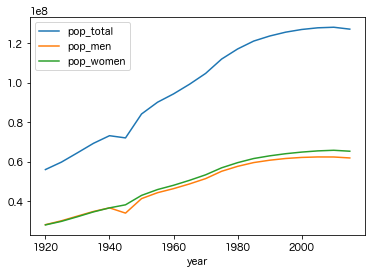

In [25]:
# Plot the graph
df_japan.plot(x = 'year')

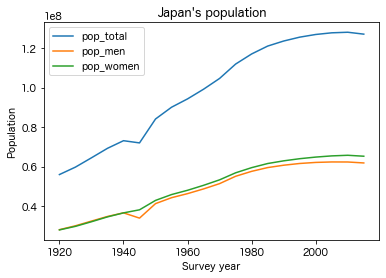

In [26]:
# Add some labels
df_japan.plot(x = 'year')
plt.title('Japan\'s population')
plt.xlabel('Survey year')
plt.ylabel('Population')
plt.legend()

In [27]:
# Create new columns with million population
df_japan['pop_total_m'] = df_japan['pop_total']/1000000
df_japan['pop_men_m'] = df_japan['pop_men']/1000000
df_japan['pop_women_m'] = df_japan['pop_women']/1000000

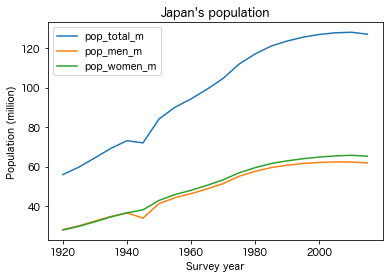

In [28]:
# Change pop variables
df_japan.plot(x = 'year', y = ['pop_total_m', 'pop_men_m', 'pop_women_m'])
plt.title('Japan\'s population')
plt.xlabel('Survey year')
plt.ylabel('Population (million)')
plt.legend()

In [29]:
# Check minimum and maximum years
print('year min {}, max {}'.format(df_japan['year'].min(), df_japan['year'].max()))
print('population min {}, max {}'.format(df_japan['pop_total_m'].min(), df_japan['pop_total_m'].max()))

year min 1920, max 2015
population min 55.963053, max 128.057352


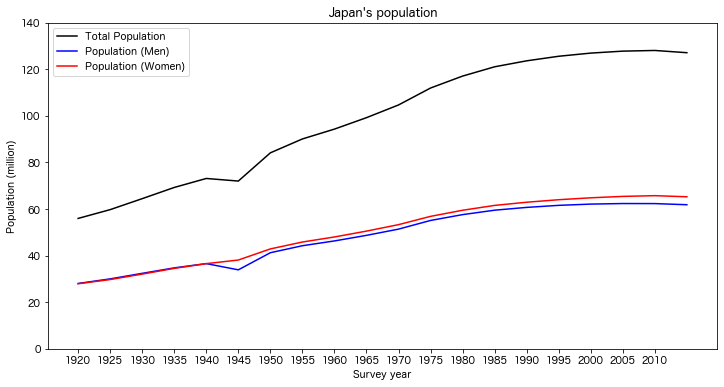

In [30]:
# Add some labels
df_japan.plot(x = 'year', y = ['pop_total_m', 'pop_men_m', 'pop_women_m'],
              color = ['black', 'blue', 'red'], figsize = (12, 6))
plt.title('Japan\'s population')
plt.xlabel('Survey year')
plt.ylabel('Population (million)')
plt.xticks(range(1920, 2015, 5))
plt.yticks(range(0, 150, 20))
plt.legend(labels = ['Total Population', 'Population (Men)', 'Population (Women)'])

Text(0, 0.5, 'Population (Million)')

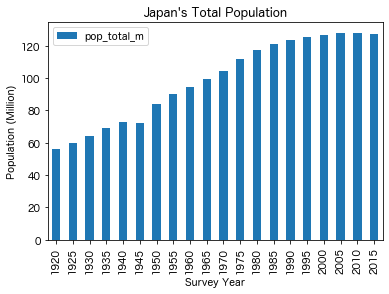

In [31]:
# bar plot
df_japan.plot.bar(x = 'year', y = 'pop_total_m')
plt.title('Japan\'s Total Population')
plt.xlabel('Survey Year')
plt.ylabel('Population (Million)')

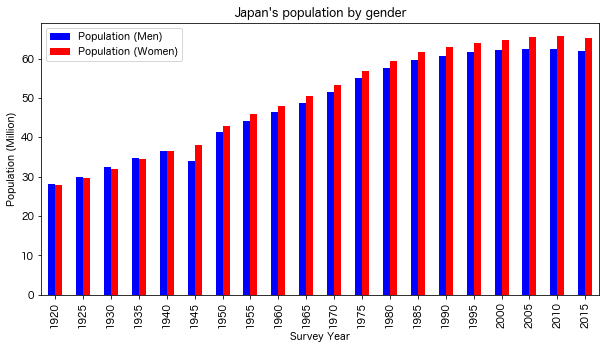

In [32]:
# bar plot
df_japan.plot.bar(x = 'year', y = ['pop_men_m', 'pop_women_m'], figsize = (10, 5), color = ['blue', 'red'])
plt.title('Japan\'s population by gender')
plt.xlabel('Survey Year')
plt.ylabel('Population (Million)')
plt.legend(labels = ['Population (Men)', 'Population (Women)'])

### Now let's look at prefecture

In [33]:
df_pref.columns

Index(['code', 'pref', 'year', 'pop_total', 'pop_men', 'pop_women'], dtype='object')

In [34]:
df_pref[['pop_total', 'pop_men', 'pop_women']].describe().T[['min', 'max']]

,min,max
pop_total,454675.0,13515271.0
pop_men,222802.0,6666690.0
pop_women,231873.0,6848581.0


In [35]:
for col in ['pop_total', 'pop_men', 'pop_women']:
    df_pref[col + '_t'] = df_pref[col] // 1000

In [36]:
df_pref.head()

,code,pref,year,pop_total,pop_men,pop_women,pop_total_t,pop_men_t,pop_women_t
0,01,北海道,1920,2359183,1244322,1114861,2359,1244,1114
1,02,青森県,1920,756454,381293,375161,756,381,375
2,03,岩手県,1920,845540,421069,424471,845,421,424
3,04,宮城県,1920,961768,485309,476459,961,485,476
4,05,秋田県,1920,898537,453682,444855,898,453,444


array([[<AxesSubplot:title={'center':'pop_total_t'}>]], dtype=object)

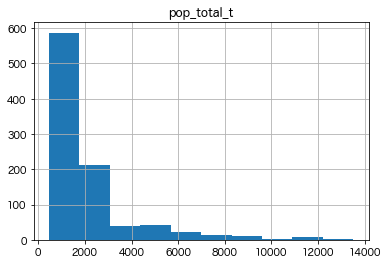

In [37]:
# Show histogram
df_pref.hist(column = ['pop_total_t'], bins  = 10)

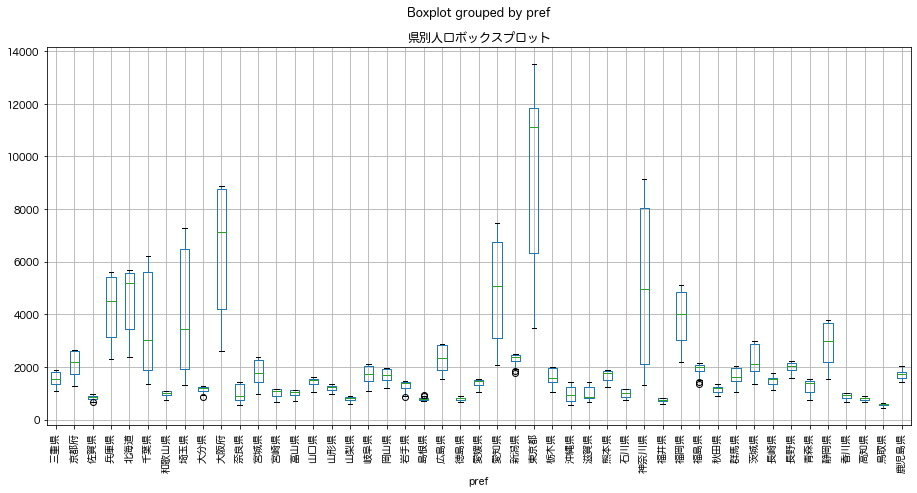

In [38]:
# Show boxplot
df_pref.boxplot(column = ['pop_total_t'], by = 'pref', figsize = (15, 7), )
plt.title('県別人口ボックスプロット')
plt.xticks(rotation = 90);

Looking into Kanto region.

In [39]:
df_pref['pref'].unique()

array(['北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県',
       '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県',
       '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '京都府', '大阪府',
       '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県',
       '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県',
       '鹿児島県', '沖縄県'], dtype=object)

In [40]:
# Select prefectures in Kanto region
kanto = ['茨城県', '栃木県', '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県']
df_kanto = df_pref.query("pref == @kanto").reset_index(drop = True)

In [41]:
df_kanto.head()

,code,pref,year,pop_total,pop_men,pop_women,pop_total_t,pop_men_t,pop_women_t
0,08,茨城県,1920,1350400,662128,688272,1350,662,688
1,09,栃木県,1920,1046479,514255,532224,1046,514,532
2,10,群馬県,1920,1052610,514106,538504,1052,514,538
3,11,埼玉県,1920,1319533,641161,678372,1319,641,678
4,12,千葉県,1920,1336155,656968,679187,1336,656,679


In [42]:
import seaborn as sns

<AxesSubplot:xlabel='pref', ylabel='pop_total_t'>

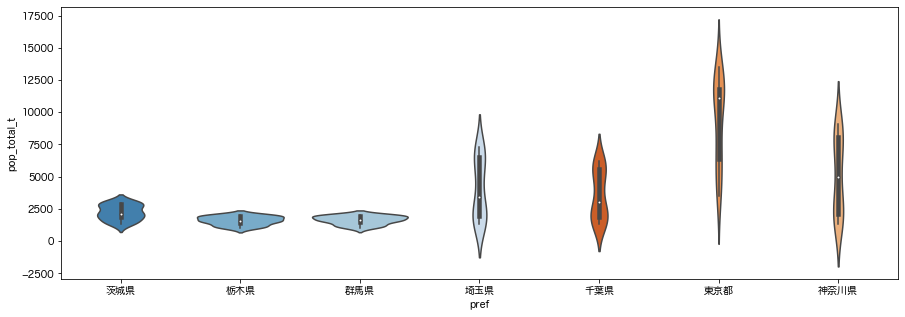

In [43]:
plt.figure(figsize = (15, 5))
sns.violinplot(x = 'pref', y = 'pop_total_t', data = df_kanto, palette = 'tab20c')

It would be more interesting if we could know gender distribution by prefecture. To do this, we need to tweak dataframe to allow Seaborn to visualize.

In [44]:
# "Melting" data to long form.
df_kanto_long = df_kanto.melt(id_vars = 'pref', value_vars = ['pop_men_t', 'pop_women_t'],
                              var_name = ['gender'], value_name = 'population')
df_kanto_long = df_kanto_long.replace({'pop_men_t':'男性', 'pop_women_t':'女性'})
df_kanto_long.head()

,pref,gender,population
0,茨城県,男性,662
1,栃木県,男性,514
2,群馬県,男性,514
3,埼玉県,男性,641
4,千葉県,男性,656


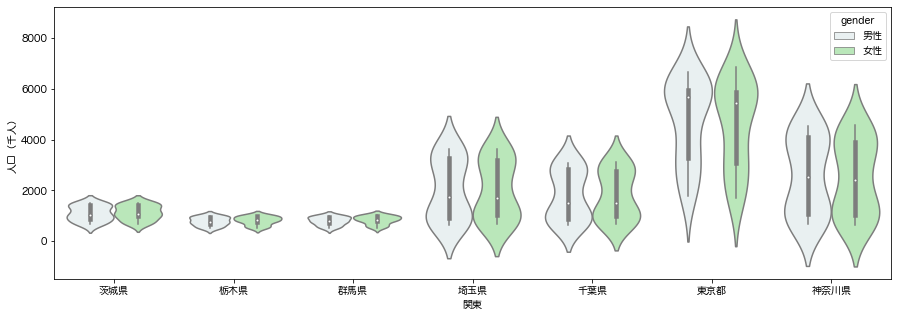

In [45]:
# Finaly shows violin plot by gender
plt.figure(figsize = (15, 5))
sns.violinplot(x = 'pref', y = 'population', hue = 'gender', data = df_kanto_long, palette = ['#E8F1F2','#B3EFB2'])
plt.xlabel('関東')
plt.ylabel('人口（千人）');

That's it!お疲れ様でした。MatplotlibやSeabornでは様々なことができるので、是非それぞれのギャラリーを確認ください。私が以前作ったグラフで、例えばムンバイで空間クラスタリングがどこでどのように発生しているかを以下の図のように作成しました。これも、Matplotlibで作っています。（図の見方は、中心点がプロジェクトの介入場所（道路整備）、外周が方角、補助線が道路からの距離、赤いドットが空間クラスタリングの発生場所です。）

<img src="img/Mumbai_horizontal_clustering.png" alt = "Mumbai Horizontal Clustering" style = "width: 300px;"/>

Visualizationで最も手っ取り早いアプローチはサンプルやexampleを真似て、段々とオリジナリティを出していくことです。<br>
Matplotlibのサンプルについては、[こちら](https://matplotlib.org/stable/gallery/index.html)を参照。<br>
Seabornのサンプルについては、[こちら](https://seaborn.pydata.org/examples/index.html)を参照。<br>

図のカラーリングは[Coolors](https://coolors.co/)がおすすめ。Coolorsでカラーパターンを作って、そこからHEXコードをコピーするのが最も手っ取り早いと思います。

---

In [46]:
# This cell is to create a config file.
# Hiding this cell for authority

# Hiding celll from https://gist.github.com/Zsailer/5d1f4e357c78409dd9a5a4e5c61be552
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Creating requirements.txt file. To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################
# Config file to freeze packages in a notebook
# from https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook
import pkg_resources
import types

def get_requirements():
    def get_imports():
        for name, val in globals().items():
            if isinstance(val, types.ModuleType):
                # Split ensures you get root package, 
                # not just imported function
                name = val.__name__.split(".")[0]

            elif isinstance(val, type):
                name = val.__module__.split(".")[0]

            # Some packages are weird and have different
            # imported names vs. system/pip names. Unfortunately,
            # there is no systematic way to get pip names from
            # a package's imported name. You'll have to add
            # exceptions to this list manually!
            poorly_named_packages = {
                "PIL": "Pillow",
                "sklearn": "scikit-learn"
            }
            if name in poorly_named_packages.keys():
                name = poorly_named_packages[name]

            yield name
    imports = list(set(get_imports()))

    # The only way I found to get the version of the root package
    # from only the name of the package is to cross-check the names 
    # of installed packages vs. imported packages
    requirements = []
    for m in pkg_resources.working_set:
        if m.project_name in imports and m.project_name!="pip":
            requirements.append((m.project_name, m.version))

    
    with open("requirements.txt", "w") as f:
        print('Create "requirements.txt"')
        for r in requirements:
            string = r[0] + '==' + r[1] + '\n'
            f.write(string)
            print("\t{}=={}".format(*r))
    print('"requirements.txt" was created.')
        
get_requirements()


Create "requirements.txt"
	seaborn==0.11.1
	pandas==1.2.4
	matplotlib==3.3.4
"requirements.txt" was created.
